In [58]:
from zipfile import ZipFile
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
data_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/data/weather_classification_data.csv'
df = pd.read_csv(data_path)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.00,73,9.50,82.00,partly cloudy,1010.82,2,Winter,3.50,inland,Rainy
1,39.00,96,8.50,71.00,partly cloudy,1011.43,7,Spring,10.00,inland,Cloudy
2,30.00,64,7.00,16.00,clear,1018.72,5,Spring,5.50,mountain,Sunny
3,38.00,83,1.50,82.00,clear,1026.25,7,Spring,1.00,coastal,Sunny
4,27.00,74,17.00,66.00,overcast,990.67,1,Winter,2.50,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.00,74,14.50,71.00,overcast,1003.15,1,Summer,1.00,mountain,Rainy
13196,-1.00,76,3.50,23.00,cloudy,1067.23,1,Winter,6.00,coastal,Snowy
13197,30.00,77,5.50,28.00,overcast,1012.69,3,Autumn,9.00,coastal,Cloudy
13198,3.00,76,10.00,94.00,overcast,984.27,0,Winter,2.00,inland,Snowy


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


<Axes: xlabel='Weather Type'>

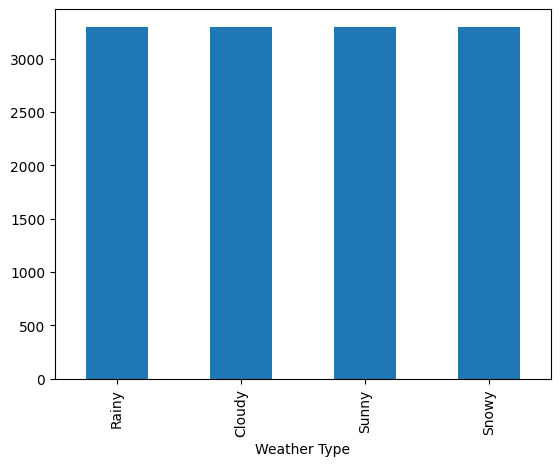

In [61]:
from matplotlib import pyplot as plt
import numpy as np
print(df['Weather Type'].value_counts())
df['Weather Type'].value_counts().plot(kind='bar')

In [62]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00
mean,19.13,68.71,9.83,53.64,1005.83,4.01,5.46
std,17.39,20.19,6.91,31.95,37.20,3.86,3.37
min,-25.00,20.00,0.00,0.00,800.12,0.00,0.00
25%,4.00,57.00,5.00,19.00,994.80,1.00,3.00
50%,21.00,70.00,9.00,58.00,1007.65,3.00,5.00
75%,31.00,84.00,13.50,82.00,1016.77,7.00,7.50
max,109.00,109.00,48.50,109.00,1199.21,14.00,20.00


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather Type'] = le.fit_transform(df['Weather Type'])
weather_type = le.classes_
df['Cloud Cover'] = le.fit_transform(df['Cloud Cover'])
cloud_cover = le.classes_
df['Season'] = le.fit_transform(df['Season'])
season = le.classes_
df['Location'] = le.fit_transform(df['Location'])
location = le.classes_
print(weather_type)
print(cloud_cover)
print(season)
print(location)

['Cloudy' 'Rainy' 'Snowy' 'Sunny']
['clear' 'cloudy' 'overcast' 'partly cloudy']
['Autumn' 'Spring' 'Summer' 'Winter']
['coastal' 'inland' 'mountain']


In [64]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.00,73,9.50,82.00,3,1010.82,2,3,3.50,1,1
1,39.00,96,8.50,71.00,3,1011.43,7,1,10.00,1,0
2,30.00,64,7.00,16.00,0,1018.72,5,1,5.50,2,3
3,38.00,83,1.50,82.00,0,1026.25,7,1,1.00,0,3
4,27.00,74,17.00,66.00,2,990.67,1,3,2.50,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.00,74,14.50,71.00,2,1003.15,1,2,1.00,2,1
13196,-1.00,76,3.50,23.00,1,1067.23,1,3,6.00,0,2
13197,30.00,77,5.50,28.00,2,1012.69,3,0,9.00,0,0
13198,3.00,76,10.00,94.00,2,984.27,0,3,2.00,1,2


In [65]:
correlation_matrix = df.corr()
print(correlation_matrix)

                      Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature                  1.00     -0.21       -0.07              -0.29   
Humidity                    -0.21      1.00        0.41               0.64   
Wind Speed                  -0.07      0.41        1.00               0.44   
Precipitation (%)           -0.29      0.64        0.44               1.00   
Cloud Cover                 -0.22      0.28        0.18               0.27   
Atmospheric Pressure         0.21     -0.12       -0.08              -0.18   
UV Index                     0.37     -0.34       -0.07              -0.29   
Season                      -0.38      0.19        0.06               0.21   
Visibility (km)              0.25     -0.48       -0.31              -0.46   
Location                    -0.20      0.08        0.01               0.09   
Weather Type                 0.03     -0.25       -0.17              -0.16   

                      Cloud Cover  Atmospheric Pressure  UV Ind

<Axes: >

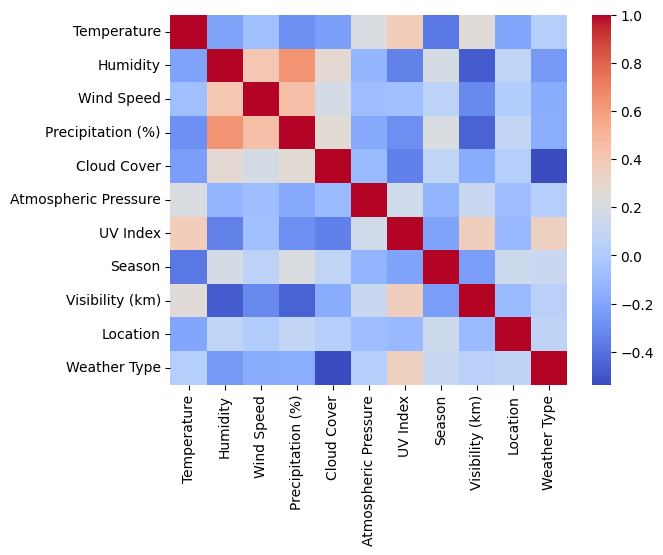

In [66]:
import seaborn as sns
sns.heatmap(correlation_matrix, cmap = 'coolwarm')

In [67]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
!pip install -q lazypredict

In [71]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

  3%|▎         | 1/29 [00:00<00:15,  1.77it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.8617424242424242, 'Balanced Accuracy': 0.8609088375537132, 'ROC AUC': None, 'F1 Score': 0.862246702209116, 'Time taken': 0.5647642612457275}


  7%|▋         | 2/29 [00:01<00:14,  1.83it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9102272727272728, 'Balanced Accuracy': 0.9096547717422215, 'ROC AUC': None, 'F1 Score': 0.9103371493341796, 'Time taken': 0.5322153568267822}
{'Model': 'BernoulliNB', 'Accuracy': 0.8556818181818182, 'Balanced Accuracy': 0.8541118622088616, 'ROC AUC': None, 'F1 Score': 0.85513372487923, 'Time taken': 0.04180145263671875}


 21%|██        | 6/29 [00:19<01:13,  3.19s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8265151515151515, 'Balanced Accuracy': 0.8241372688192967, 'ROC AUC': None, 'F1 Score': 0.8255728385426737, 'Time taken': 18.41512393951416}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.906060606060606, 'Balanced Accuracy': 0.9052913934522197, 'ROC AUC': None, 'F1 Score': 0.9060796301048953, 'Time taken': 0.10894465446472168}
{'Model': 'DummyClassifier', 'Accuracy': 0.2428030303030303, 'Balanced Accuracy': 0.25, 'ROC AUC': None, 'F1 Score': 0.09487152845122977, 'Time taken': 0.03177523612976074}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8787878787878788, 'Balanced Accuracy': 0.8776708064356469, 'ROC AUC': None, 'F1 Score': 0.8788295107799148, 'Time taken': 0.03981804847717285}


 31%|███       | 9/29 [00:23<00:43,  2.18s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9106060606060606, 'Balanced Accuracy': 0.9099706781128192, 'ROC AUC': None, 'F1 Score': 0.9107762605831814, 'Time taken': 3.438668727874756}
{'Model': 'GaussianNB', 'Accuracy': 0.8628787878787879, 'Balanced Accuracy': 0.8614702938662797, 'ROC AUC': None, 'F1 Score': 0.862700871719051, 'Time taken': 0.07610297203063965}


 38%|███▊      | 11/29 [00:25<00:32,  1.81s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8916666666666667, 'Balanced Accuracy': 0.890790646059081, 'ROC AUC': None, 'F1 Score': 0.8918799033047735, 'Time taken': 2.0236799716949463}


 41%|████▏     | 12/29 [00:33<00:51,  3.03s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.8916666666666667, 'Balanced Accuracy': 0.8906088163913755, 'ROC AUC': None, 'F1 Score': 0.8915099626477981, 'Time taken': 8.284090518951416}


 45%|████▍     | 13/29 [00:42<01:09,  4.37s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.8916666666666667, 'Balanced Accuracy': 0.8906088163913755, 'ROC AUC': None, 'F1 Score': 0.8915099626477981, 'Time taken': 9.33987307548523}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8352272727272727, 'Balanced Accuracy': 0.8328320080732221, 'ROC AUC': None, 'F1 Score': 0.8343450775953402, 'Time taken': 0.04222679138183594}


 55%|█████▌    | 16/29 [00:45<00:32,  2.49s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.8200757575757576, 'Balanced Accuracy': 0.8175003716324142, 'ROC AUC': None, 'F1 Score': 0.8188585779287471, 'Time taken': 2.1469566822052}
{'Model': 'LogisticRegression', 'Accuracy': 0.8484848484848485, 'Balanced Accuracy': 0.8465173361984888, 'ROC AUC': None, 'F1 Score': 0.8478857517404766, 'Time taken': 0.10020017623901367}


 59%|█████▊    | 17/29 [00:45<00:23,  1.94s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.8257575757575758, 'Balanced Accuracy': 0.8235245538211639, 'ROC AUC': None, 'F1 Score': 0.8251176985182801, 'Time taken': 0.11185407638549805}


 69%|██████▉   | 20/29 [00:55<00:21,  2.34s/it]

{'Model': 'NuSVC', 'Accuracy': 0.8765151515151515, 'Balanced Accuracy': 0.8757247136086934, 'ROC AUC': None, 'F1 Score': 0.8776046563299398, 'Time taken': 10.087843656539917}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.7859848484848485, 'Balanced Accuracy': 0.7825857474772234, 'ROC AUC': None, 'F1 Score': 0.7844909678165739, 'Time taken': 0.0596013069152832}
{'Model': 'Perceptron', 'Accuracy': 0.5992424242424242, 'Balanced Accuracy': 0.5963139147659864, 'ROC AUC': None, 'F1 Score': 0.6068756665258659, 'Time taken': 0.042742252349853516}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8776515151515152, 'Balanced Accuracy': 0.876640580384747, 'ROC AUC': None, 'F1 Score': 0.877666404109666, 'Time taken': 0.036383867263793945}


 83%|████████▎ | 24/29 [00:57<00:05,  1.14s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9102272727272728, 'Balanced Accuracy': 0.9095629902920049, 'ROC AUC': None, 'F1 Score': 0.9103283681335416, 'Time taken': 1.314854383468628}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7946969696969697, 'Balanced Accuracy': 0.7916306547191357, 'ROC AUC': None, 'F1 Score': 0.7928544632439462, 'Time taken': 0.0330197811126709}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7950757575757575, 'Balanced Accuracy': 0.7920206703197598, 'ROC AUC': None, 'F1 Score': 0.7932560233287967, 'Time taken': 0.0626835823059082}
{'Model': 'SGDClassifier', 'Accuracy': 0.834469696969697, 'Balanced Accuracy': 0.8326257152011896, 'ROC AUC': None, 'F1 Score': 0.8326378714837378, 'Time taken': 0.19347095489501953}


 90%|████████▉ | 26/29 [00:58<00:03,  1.08s/it]

{'Model': 'SVC', 'Accuracy': 0.9068181818181819, 'Balanced Accuracy': 0.9060936555129443, 'ROC AUC': None, 'F1 Score': 0.9068768683321342, 'Time taken': 1.6888017654418945}


 97%|█████████▋| 28/29 [00:59<00:00,  1.19it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.915530303030303, 'Balanced Accuracy': 0.9148943495774162, 'ROC AUC': None, 'F1 Score': 0.9156369638951002, 'Time taken': 0.7046167850494385}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 733
[LightGBM] [Info] Number of data points in the train set: 10560, number of used features: 10
[LightGBM] [Info] Start training from score -1.382891
[LightGBM] [Info] Start training from score -1.381382
[LightGBM] [Info] Start training from score -1.401947
[LightGBM] [Info] Start training from score -1.379123


100%|██████████| 29/29 [01:00<00:00,  2.08s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9109848484848485, 'Balanced Accuracy': 0.9102131094513948, 'ROC AUC': None, 'F1 Score': 0.9109200484039339, 'Time taken': 0.7882068157196045}
                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.92               0.91    None      0.92   
LGBMClassifier                     0.91               0.91    None      0.91   
ExtraTreesClassifier               0.91               0.91    None      0.91   
BaggingClassifier                  0.91               0.91    None      0.91   
RandomForestClassifier             0.91               0.91    None      0.91   
SVC                                0.91               0.91    None      0.91   
DecisionTreeClassifier             0.91               0.91    None      0.91   
KNeighborsClassifier               0.89               0.89    None      0.89   
LabelPropagation

In [72]:
!pip install xgboost


In [73]:
from xgboost import XGBClassifier
model = XGBClassifier()

# Huấn luyện mô hình
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.915530303030303


In [75]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare

,Actual,Predicted
4111,3,3
10607,3,3
7372,3,3
11786,2,2
12227,3,3
...,...,...
2543,1,1
96,1,1
2474,2,2
2522,2,2


In [76]:
features = [[30.0	,64,	7.0	,16.0	,0	,1018.72	,5	,1,	5.5,	2	]]
features = scaler.transform(features)
prediction = model.predict(features)
print(prediction)

[3]


In [77]:
import pickle
with open('xgb_model.pkl', 'rb') as f:
  save_model = pickle.load(f)

In [78]:
prediction = save_model.predict(features)
print(prediction)

[3]


In [79]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)